A Fresh code based on intermediate training method; 
Sourav Saha, NU and SNL, sourav023@u.northwestern.edu

In [1]:
#first part just the DLDC part 

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
import random
import pandas as pd

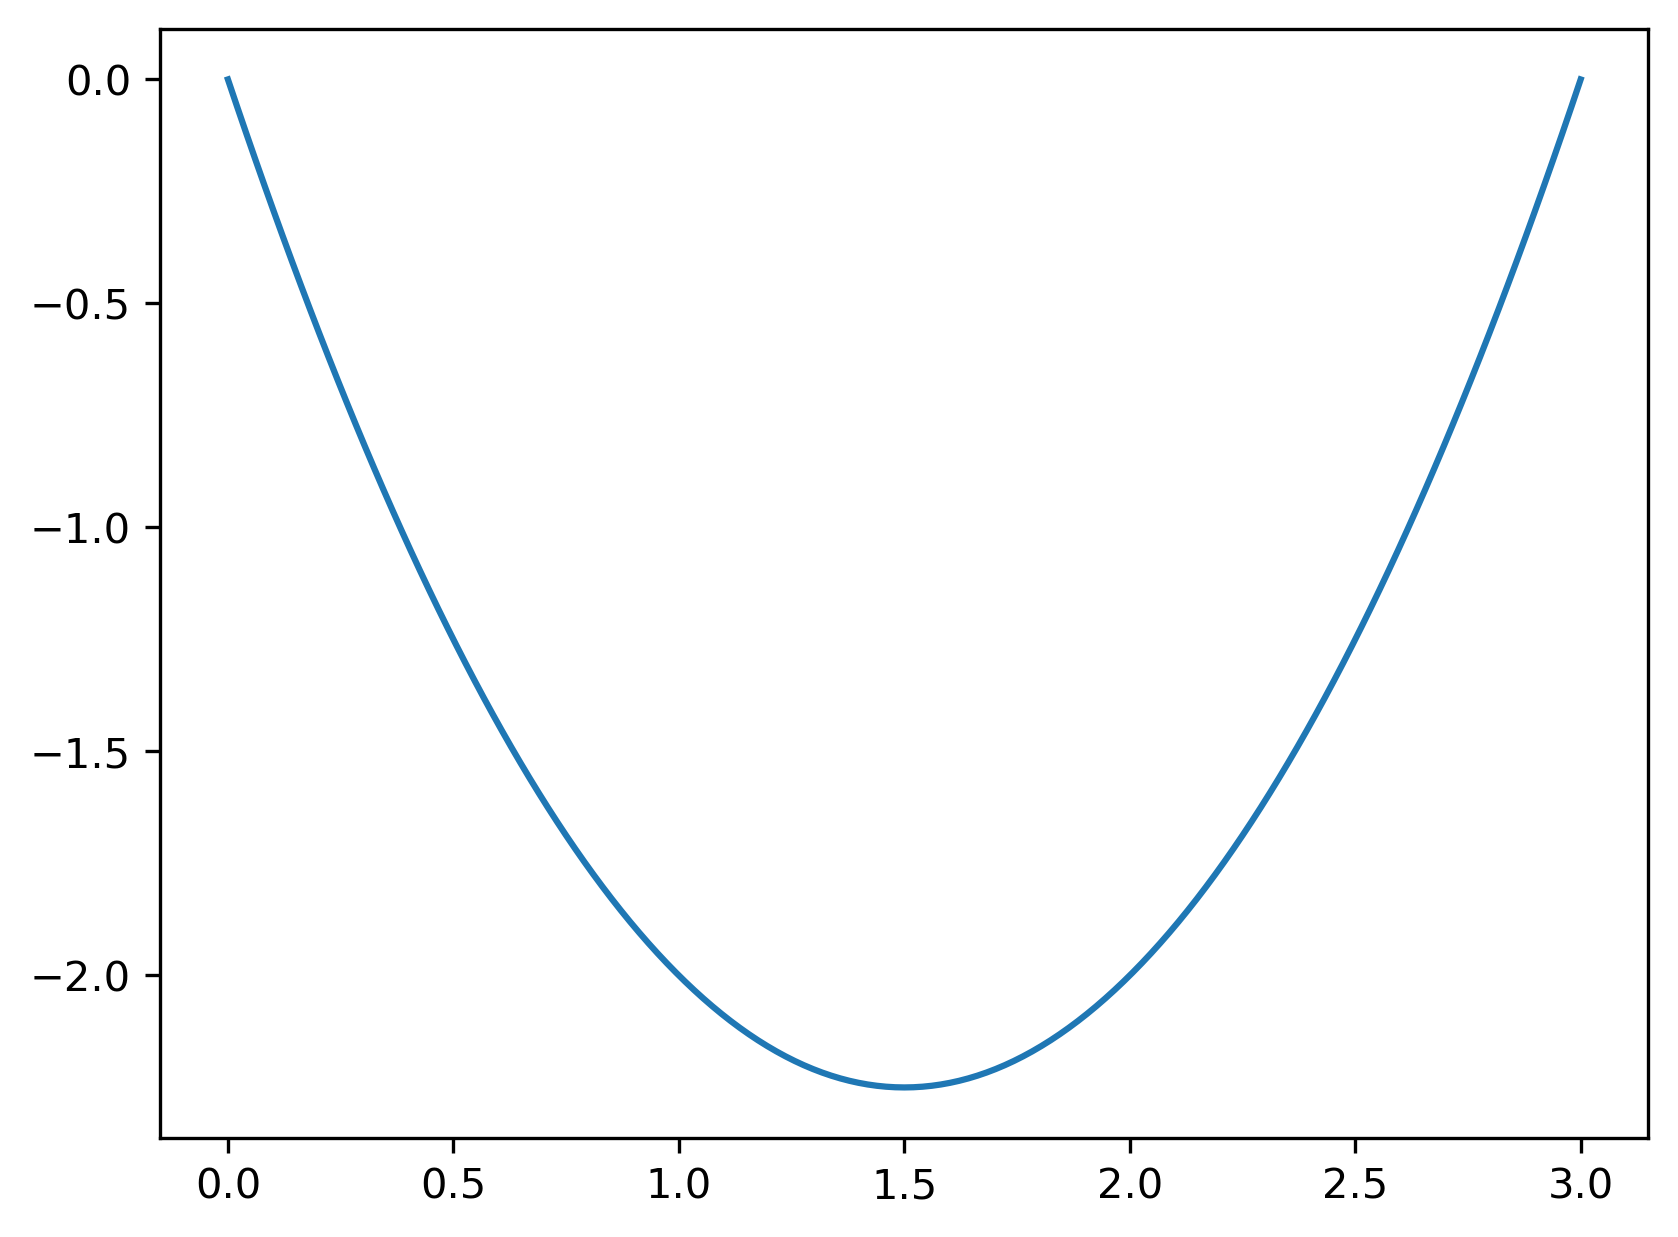

In [3]:
plt.rcParams['figure.dpi'] = 300
## DLDC for better approximating the differential operator
## Generate dataset form arbitrary function
disp_file = r"C:\Users\icme2\Downloads\disp.csv"
df_disp = pd.read_csv(disp_file)
num_sample = 149

x = np.linspace(0, 3, num_sample)
dx = x[1]-x[0]
y = x**2-3*x
dydx = np.gradient(y, dx)
## Re-arraging data
X = np.column_stack((y[1:], y[:-1]))
Y = dydx[1:]
plt.figure()
plt.plot(x, y, label='$x^2-3x$')

In [4]:
#creating the encoder-decoder network
#creating custom layer for the Sobol Kernel
class DLDCLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.size_in= 2
        weights = torch.Tensor(1,2)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        # initialize weights and biases
       # torch.nn.init.normal_(self.weights, mean = 150.0, std=1.0)
    def forward(self, x):
        x_out = torch.Tensor(1,1)
        x_out = self.weights[0][1]*x[1]+self.weights[0][0]*x[0]
        return x_out
class DLDC_NN(torch.nn.Module, float):
    def __init__(self):
        super().__init__()
        self.derivative = torch.nn.Sequential(
            DLDCLayer()
        )
    def forward(self, x):
        Derivative = self.derivative(x)
        #decoded = self.decoder(encoded)
        return Derivative

# Model Initialization
model = DLDC_NN()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.01,
                             weight_decay = 1e-10)

In [5]:
epochs = 7000
outputs = []
losses = []

tensor_X = torch.from_numpy(X)
tensor_Y = torch.from_numpy(Y)

ite = num_sample-1

#print(tensor_X)

for epoch in range(epochs):
    for i in range(ite):
        # Output of Autoencoder
        reconstructed = model(tensor_X[i][:].float())
        tensor_Y = tensor_Y.view(ite, 1)
  
        # Calculating the loss function
        loss = loss_function(reconstructed, tensor_Y[i].float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        w = list(model.parameters())
    if (epoch%100)==0:    
        print(f'Epoch:{epoch+1}, Loss:{loss}')   
    outputs.append((epoch, loss))

C:\Users\icme2\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:1, Loss:8.679425239562988
Epoch:101, Loss:7.945703029632568
Epoch:201, Loss:7.211976528167725
Epoch:301, Loss:6.515071392059326
Epoch:401, Loss:5.854740142822266
Epoch:501, Loss:5.2307353019714355
Epoch:601, Loss:4.642745494842529
Epoch:701, Loss:4.090458393096924
Epoch:801, Loss:3.573558807373047
Epoch:901, Loss:3.0916802883148193
Epoch:1001, Loss:2.644507646560669
Epoch:1101, Loss:2.2317943572998047
Epoch:1201, Loss:1.8534746170043945
Epoch:1301, Loss:1.5098522901535034
Epoch:1401, Loss:1.2014830112457275
Epoch:1501, Loss:0.9291038513183594
Epoch:1601, Loss:0.6932233572006226
Epoch:1701, Loss:0.49378111958503723
Epoch:1801, Loss:0.329915851354599
Epoch:1901, Loss:0.20136159658432007
Epoch:2001, Loss:0.10742253810167313
Epoch:2101, Loss:0.045675866305828094
Epoch:2201, Loss:0.012379622086882591
Epoch:2301, Loss:0.0008744896622374654
Epoch:2401, Loss:4.642738713300787e-05
Epoch:2501, Loss:6.670814036624506e-05
Epoch:2601, Loss:6.687571294605732e-05
Epoch:2701, Loss:6.686011329293

In [6]:
test_data = np.ones(ite)
for i in range(ite):           
    outputs_test = model(tensor_X[i][:].float())
    outputs_test.detach().numpy()
    test_data[i] = test_data[i]*outputs_test

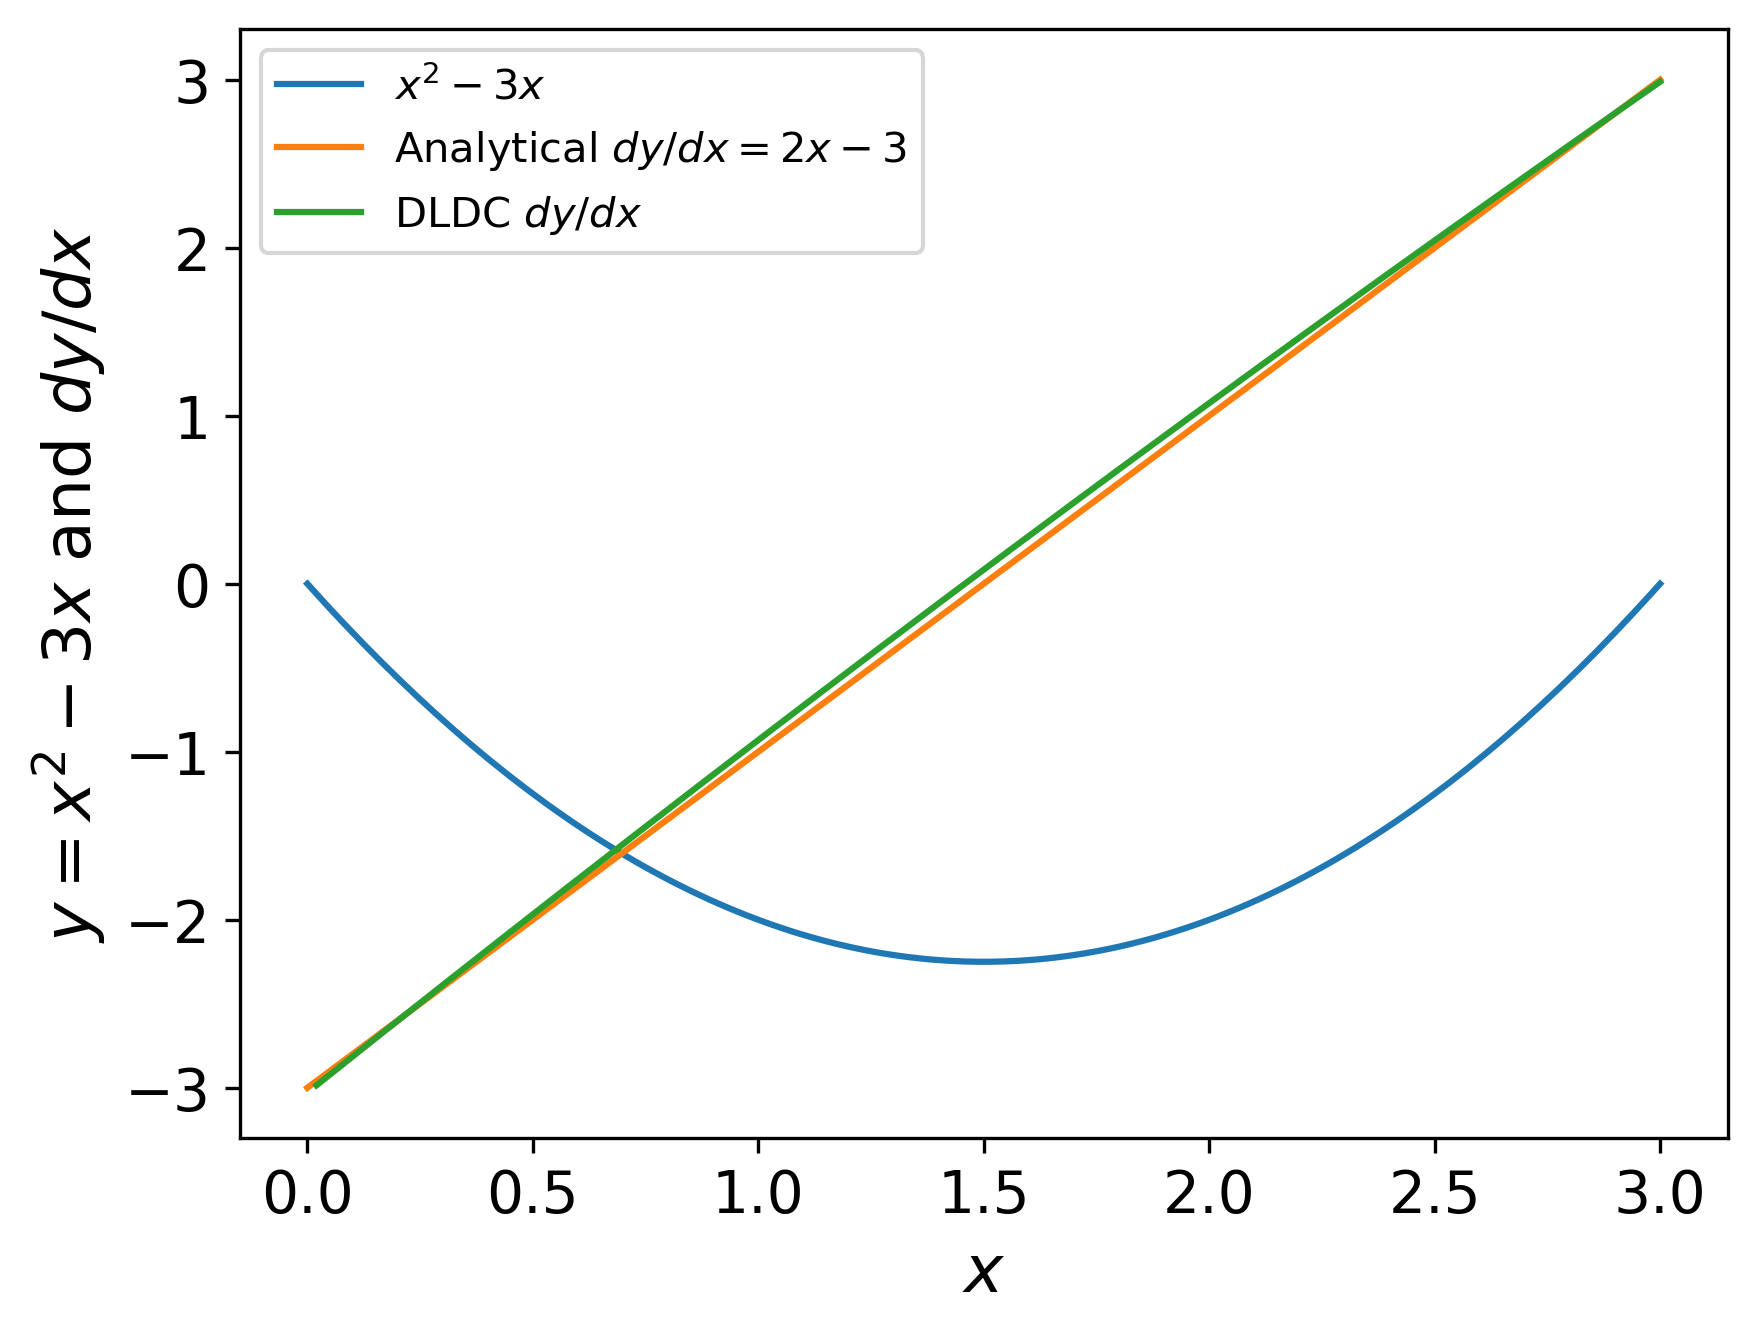

In [7]:
x = np.linspace(0, 3, num_sample)
dx = x[1]-x[0]
y = x**2-3*x
dydx = 2*x-3
plt.figure()
plt.plot(x, y, label='$x^2-3x$')
plt.plot(x, dydx, label='Analytical $dy/dx = 2x-3$')
plt.plot(x[1:], test_data, label='DLDC $dy/dx$')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y=x^2-3x$ and $dy/dx$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show(block=False)

In [8]:
1/dx

49.33333333333333

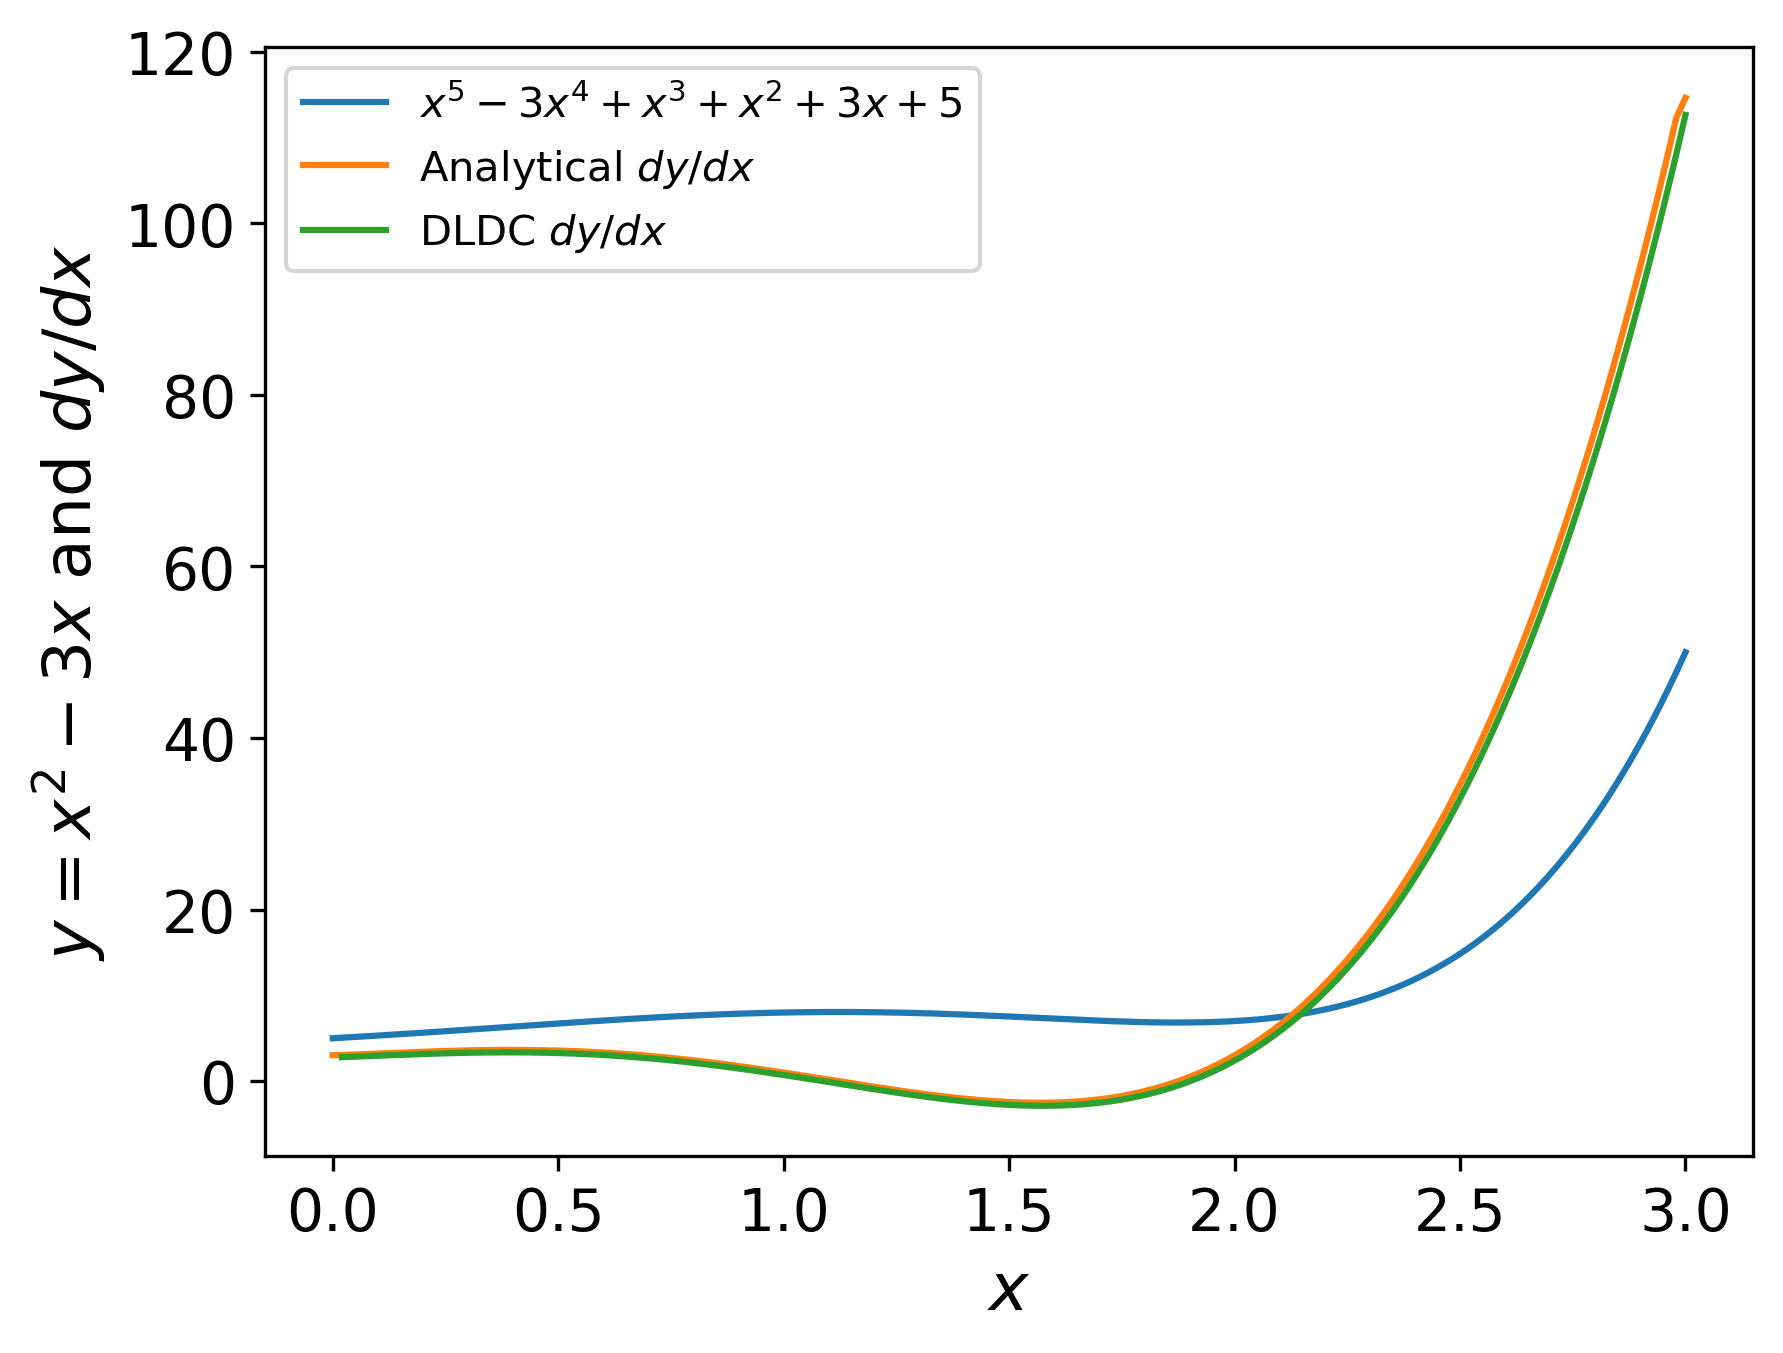

In [9]:
x = np.linspace(0, 3, num_sample)
dx = x[1]-x[0]
y = x**5-3*x**4+x**3+x**2+3*x+5
dydx = np.gradient(y, dx)
## Re-arraging data
X = np.column_stack((y[1:], y[:-1]))
tensor_X = torch.from_numpy(X)

test_data = np.ones(ite)
for i in range(ite):           
    outputs_test = model(tensor_X[i][:].float())
    outputs_test.detach().numpy()
    test_data[i] = test_data[i]*outputs_test

plt.figure()
plt.plot(x, y, label='$x^5-3x^4+x^3+x^2+3x+5$')
plt.plot(x, dydx, label='Analytical $dy/dx$')
plt.plot(x[1:], test_data, label='DLDC $dy/dx$')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y=x^2-3x$ and $dy/dx$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show(block=False)

So far we have trained the dldc NN; now the transformer

In [10]:
# New function with other gap of variables
pool = np.linspace(0,3,400)
#eta = np.linspace(0,50,num_sample)
eta = np.random.choice(pool, num_sample,replace=False,)
eta.sort()
deta = eta[1]-eta[0]
F = 5*eta**3-3*eta**2+10*eta+6
#dydx = 20*eta**3-6*eta+10
ddF = np.gradient(F)
ddeta = np.gradient(eta)
dydx1 = np.gradient(F,eta)
dydx2 = ddF/ddeta

In [11]:
#Final derivative Step
F_conv = F

In [12]:
F_mod = np.column_stack((F_conv[1:], F_conv[:-1]))
eta_mod = np.column_stack((eta[1:], eta[:-1]))

In [13]:
tensor_F_mod = torch.from_numpy(F_mod)
tensor_eta_mod = torch.from_numpy(eta_mod)

In [14]:
test_data_1 = np.ones(ite)
test_data_2 = np.ones(ite)
for i in range(ite):           
    outputs_test1 = model(tensor_F_mod[i][:].float())
    outputs_test1.detach().numpy()
    outputs_test2 = model(tensor_eta_mod[i][:].float())
    outputs_test2.detach().numpy()
    test_data_1[i] = test_data_1[i]*outputs_test1
    test_data_2[i] = test_data_2[i]*outputs_test2

In [15]:
Factor1 = np.reciprocal(test_data_2)

In [16]:
final_result = np.multiply(test_data_1,Factor1)

In [17]:
#creating the denoising encoder-decoder network
class MyLayer(nn.Module):
    def __init__(self):
        super().__init__()
        self.size_in= num_sample
        weights = torch.Tensor(1,num_sample-1)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.

        # initialize weights and biases
        torch.nn.init.normal_(self.weights, mean=0.0, std=0.5)
    def forward(self, x):
        x_out = torch.Tensor(num_sample-1,1)
        x_out = self.weights*x
        return x_out
class Denoiser(torch.nn.Module, float):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(num_sample-1, 100),
            #torch.nn.ReLU(),
            torch.nn.Linear(100, 100),
            #torch.nn.ReLU(),
            torch.nn.Linear(100, 100),
            #torch.nn.ReLU(),
            torch.nn.Linear(100, num_sample-1),
            #torch.nn.ReLU(),
            MyLayer()
        )
    def forward(self, x):
        encoded = self.encoder(x)
        #decoded = self.decoder(encoded)
        return encoded
    def loss(self, x):
        trial = self.encoder(x)
        part1 = trial[0][0:num_sample-2]
        #print(trial.size())
        part2 = trial[0][1:num_sample-1]
        #print(part2)
        Lf1 = nn.L1Loss(size_average=None, reduce=None, reduction='mean')
        loss1 = Lf1(part1, part2)
        Lf2 = nn.MSELoss(size_average=None, reduce=None, reduction='mean')
        loss2 = Lf2(trial, x)
        LOSS =  loss1 + 0.05*loss2
        return LOSS

# Model Initialization
model2 = Denoiser()
 
# Validation using MSE Loss function
#loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model2.parameters(),
                             lr = 1e-2,
                             weight_decay = 1e-8)

epochs = 2000
outputs = []
losses = []

#tensor_X = torch.from_numpy(y)
tensor_Y = torch.from_numpy(final_result)

#print(tensor_X)

for epoch in range(epochs):
    # Output of Autoencoder
    #reconstructed = model(tensor_Y.float())
    #tensor_Y = tensor_Y.view(96, 1)
  
    # Calculating the loss function
    loss = model2.loss(tensor_Y.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch%100)==0:    
        print(f'Epoch:{epoch+1}, Loss:{loss}')   
    outputs.append((epoch, loss))

C:\Users\icme2\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([148])) that is different to the input size (torch.Size([1, 148])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:1, Loss:228.15834045410156
Epoch:101, Loss:3.2990567684173584
Epoch:201, Loss:3.4298717975616455
Epoch:301, Loss:2.915179967880249
Epoch:401, Loss:2.860531806945801
Epoch:501, Loss:2.6333718299865723
Epoch:601, Loss:2.6384830474853516
Epoch:701, Loss:2.5005874633789062
Epoch:801, Loss:2.533170223236084
Epoch:901, Loss:2.7034101486206055
Epoch:1001, Loss:2.604870557785034
Epoch:1101, Loss:2.460587978363037
Epoch:1201, Loss:2.4714481830596924
Epoch:1301, Loss:2.4555649757385254
Epoch:1401, Loss:2.467247724533081
Epoch:1501, Loss:2.44087553024292
Epoch:1601, Loss:2.372021436691284
Epoch:1701, Loss:2.4413065910339355
Epoch:1801, Loss:2.4053382873535156
Epoch:1901, Loss:2.310821294784546


In [18]:
reconstructed = model2(tensor_Y.float())
reconstructed = reconstructed.detach().numpy()

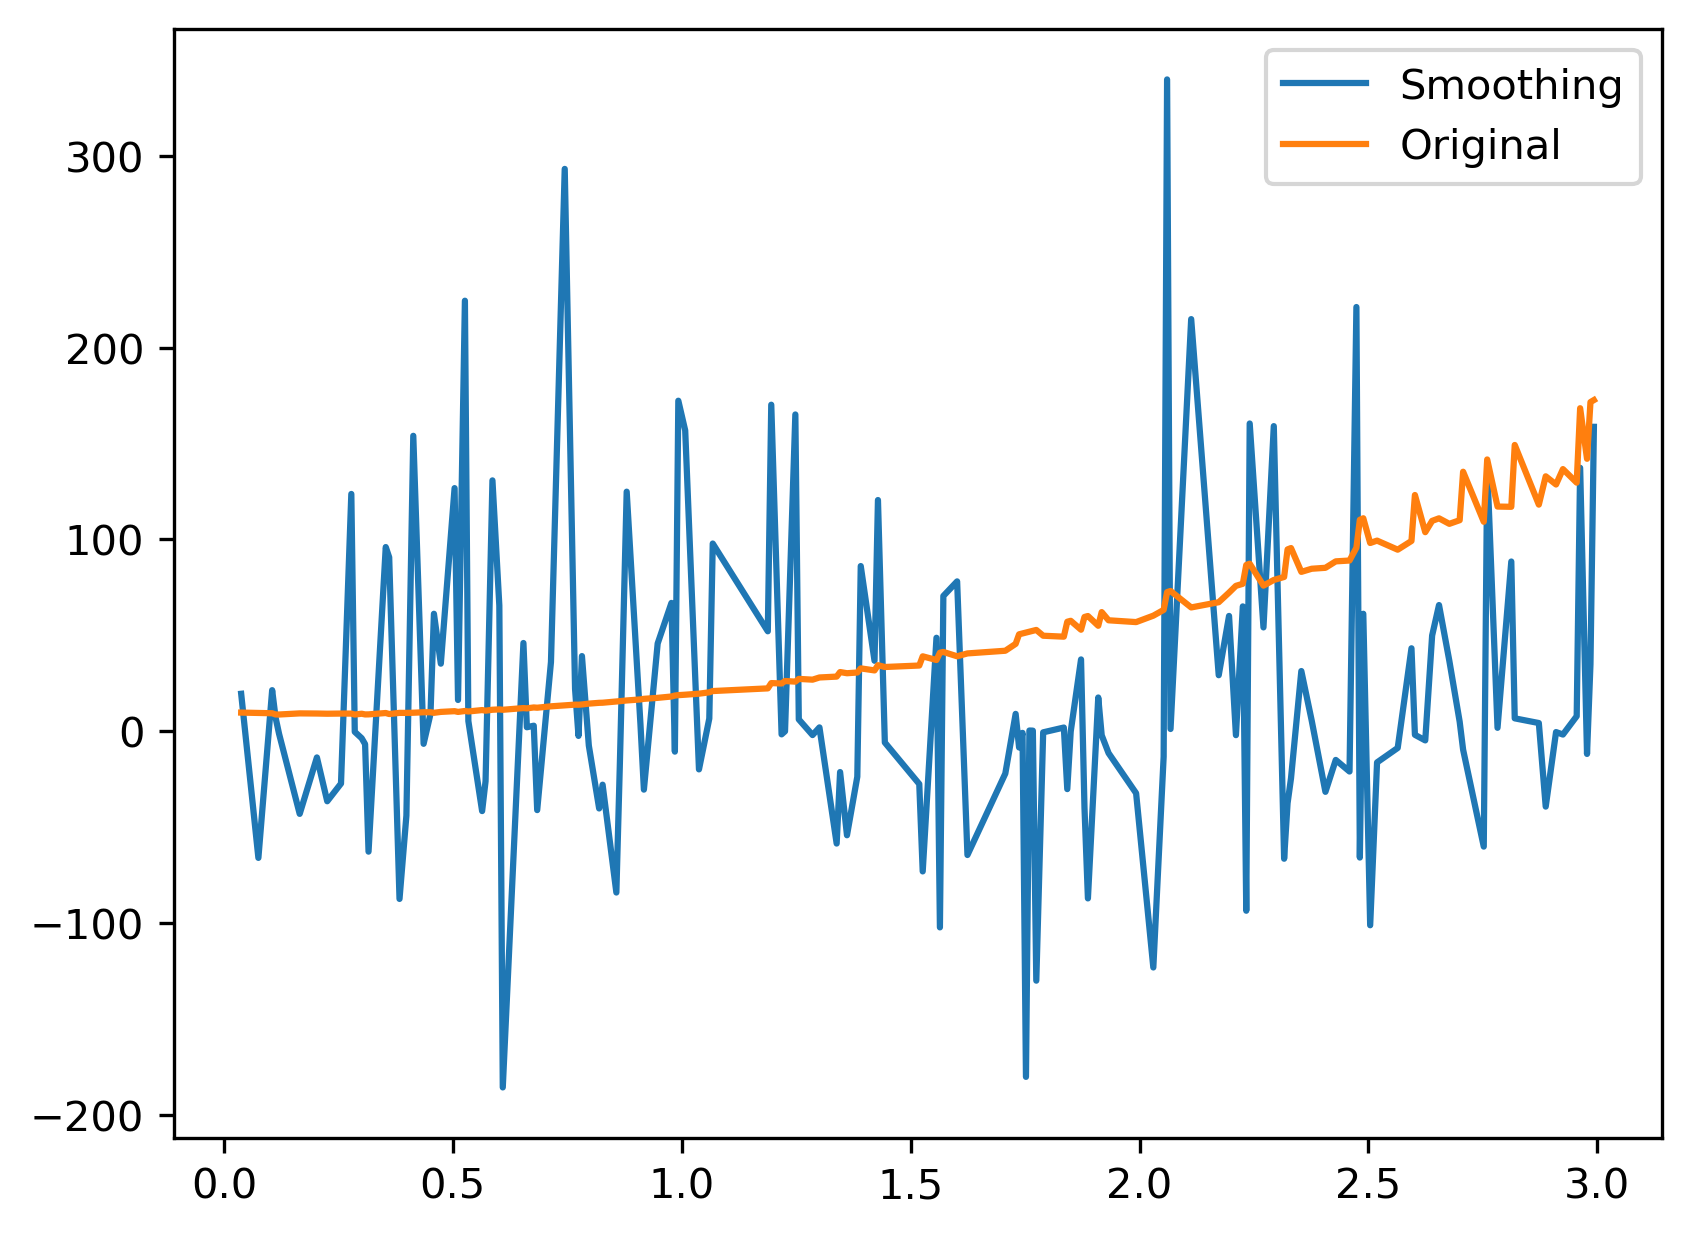

In [19]:
#test_tensor_X = torch.from_numpy(x)
plt.plot(eta[1:], reconstructed[0][:], label='Smoothing')
plt.plot(eta[1:], final_result, label='Original')
#plt.plot(x, y_noise, label='With noise')
plt.legend()

0.9196953950385987

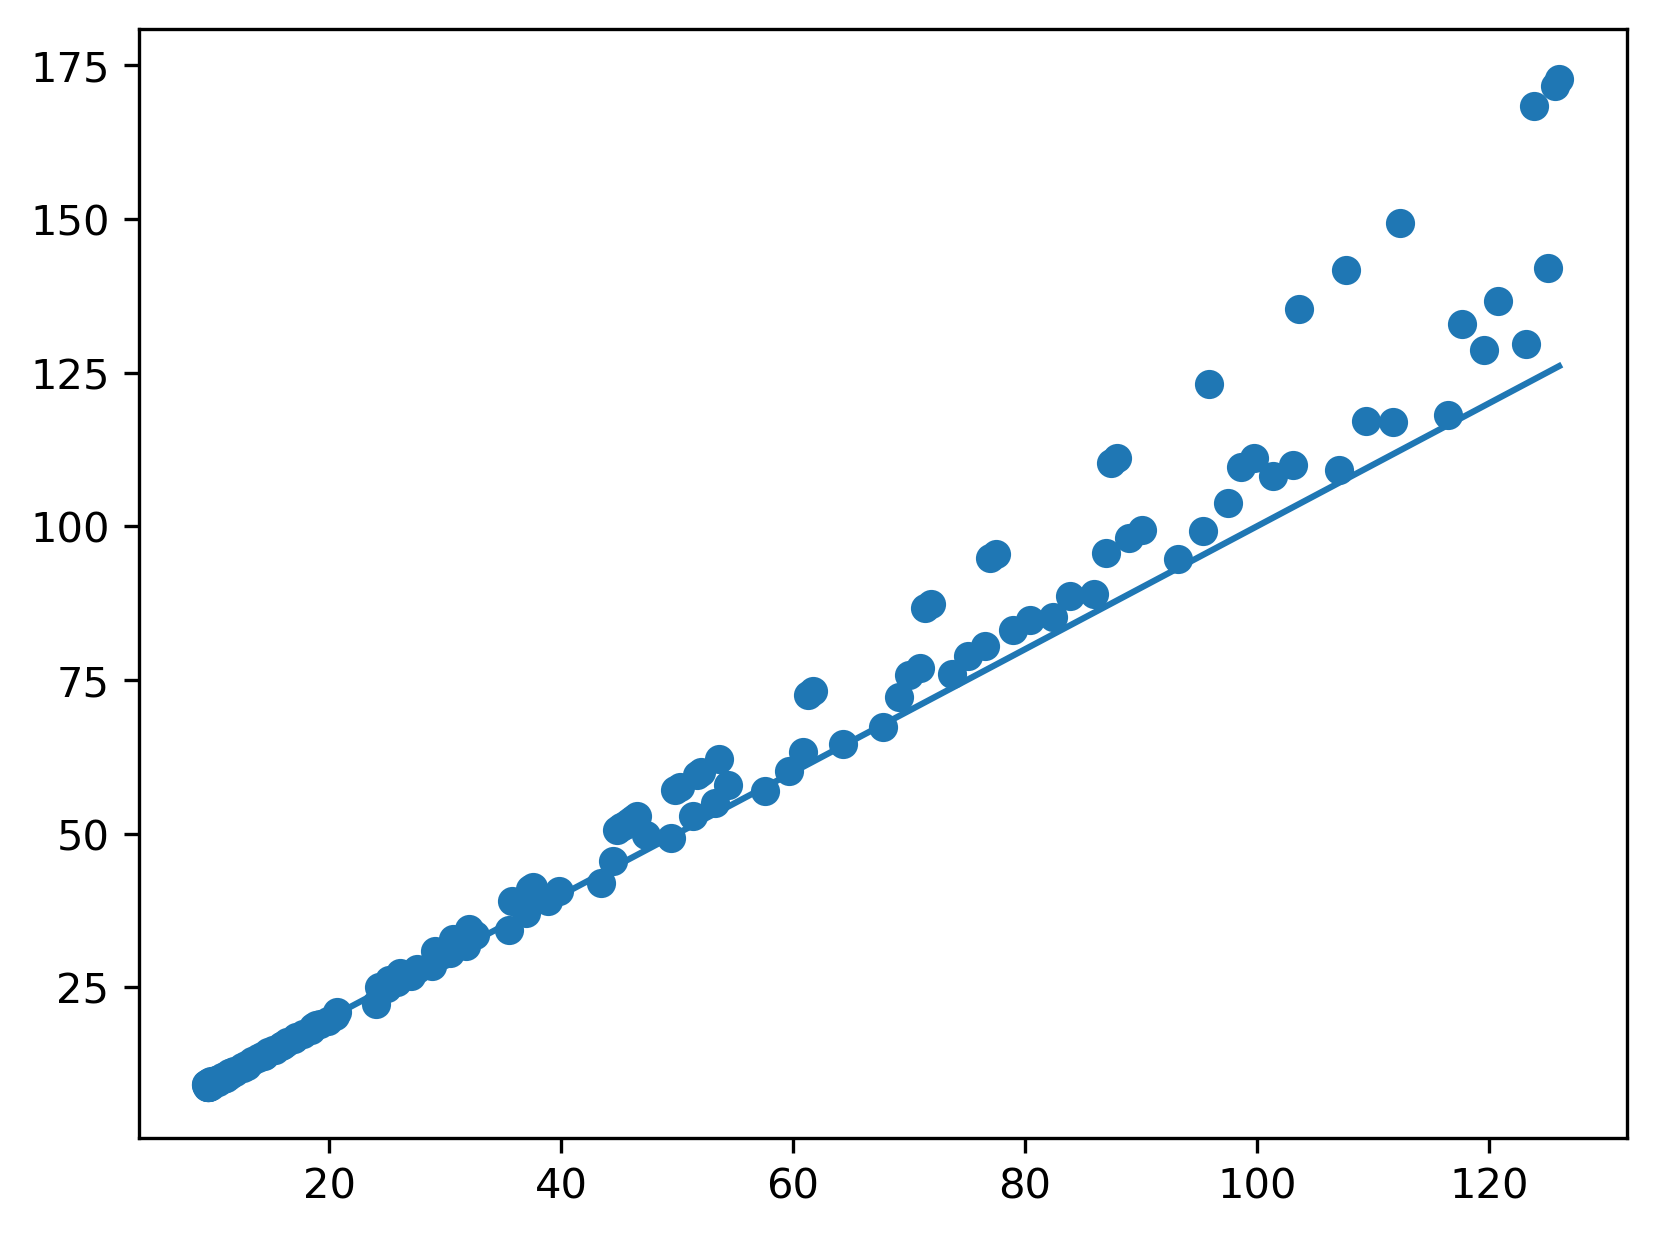

In [20]:
plt.scatter(dydx1[1:],final_result)
plt.plot(dydx1[1:],dydx1[1:])
from sklearn.metrics import r2_score
r2_score(dydx1[1:], final_result)

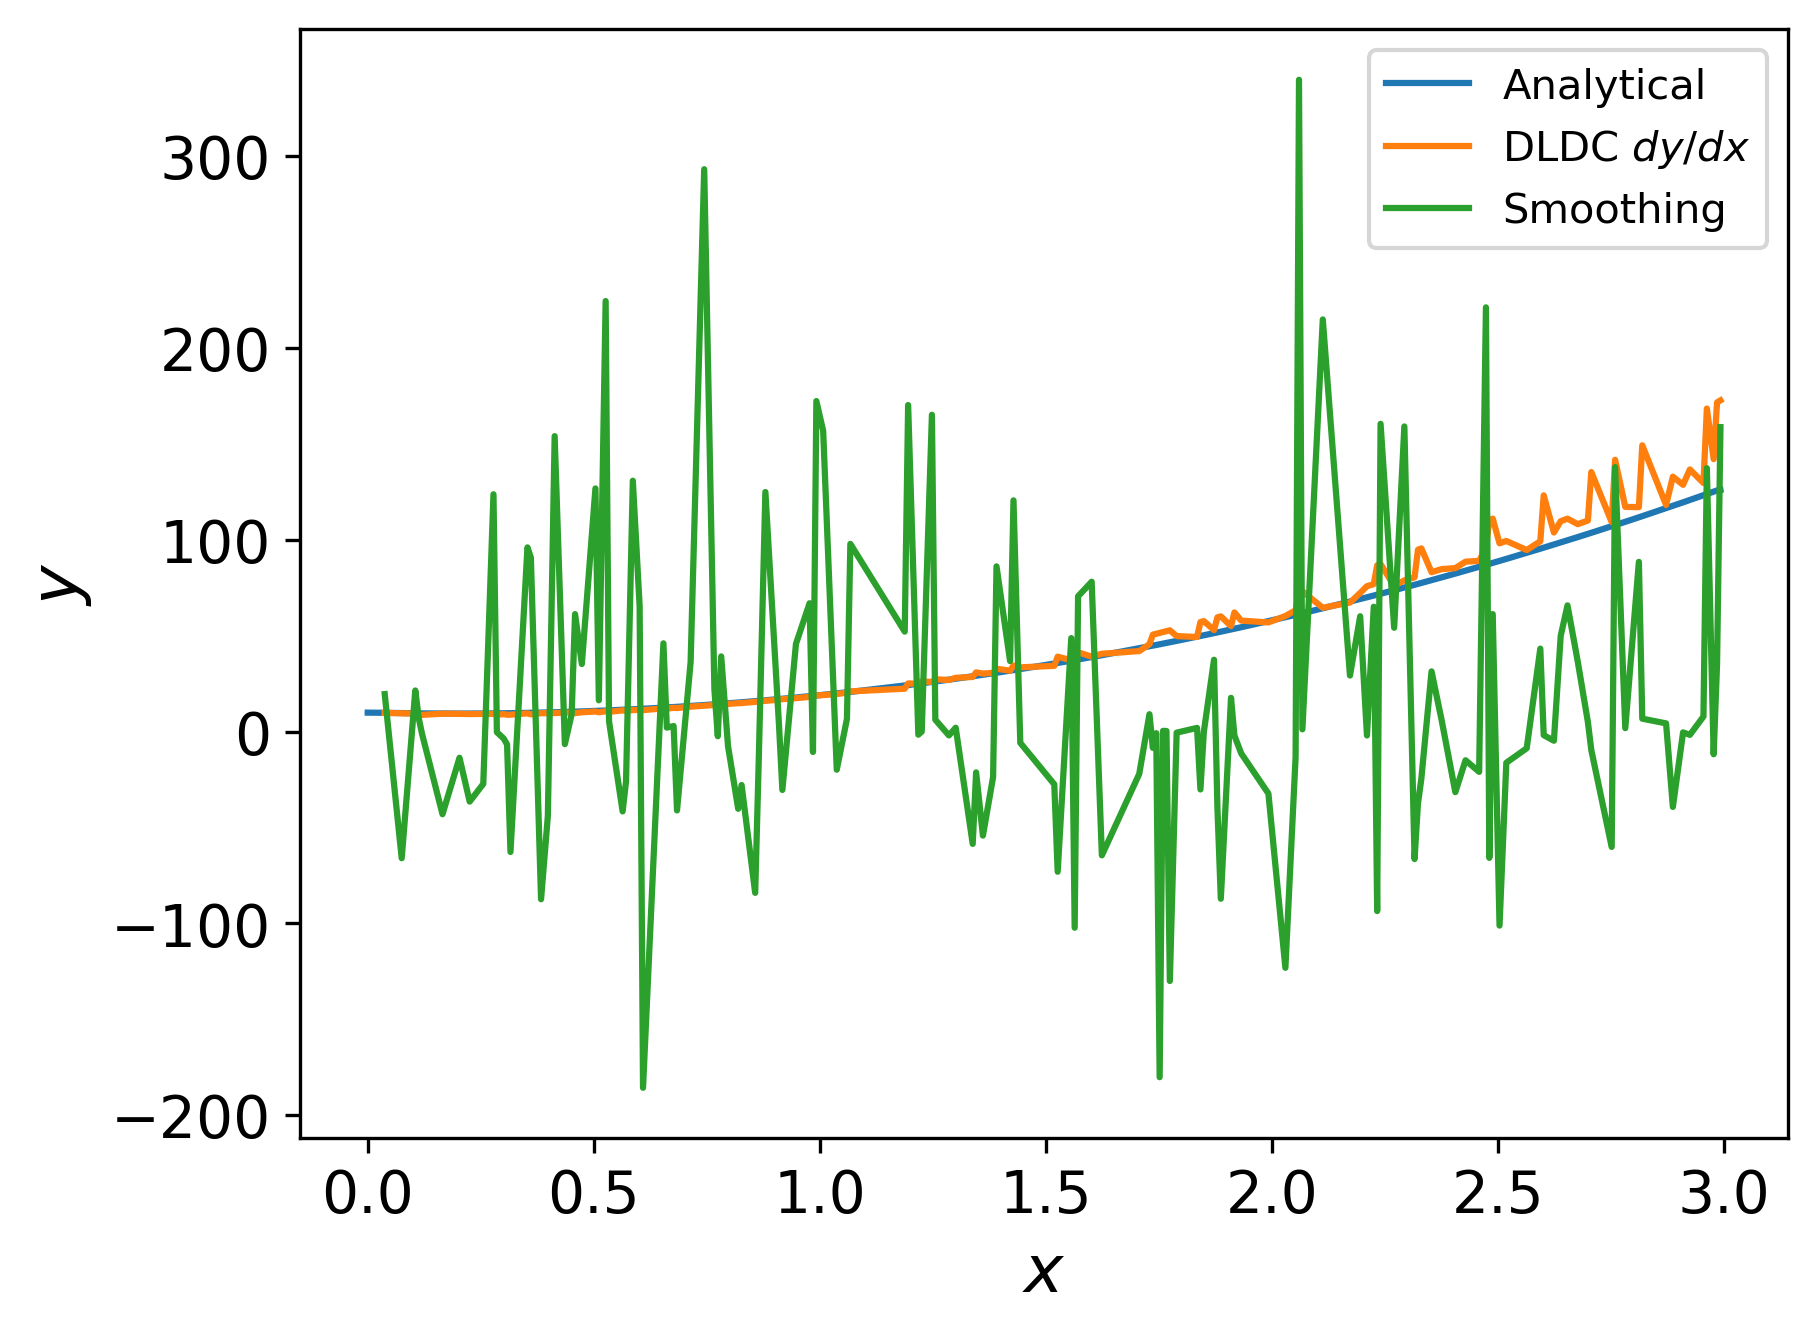

In [21]:
plt.figure()
#plt.plot(x, y, label='$x^2-3x$')
plt.plot(eta, dydx1,label='Analytical')
plt.plot(eta[1:], final_result, label='DLDC $dy/dx$')
plt.plot(eta[1:], reconstructed[0][:], label='Smoothing')
plt.xlabel('$x$',fontsize=16)
plt.ylabel('$y$',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.show(block=False)

In [22]:
x = df_disp['t/s'].to_numpy()
u = df_disp['disp'].to_numpy()
u_mod = np.column_stack((u[1:], u[:-1]))
x_mod = np.column_stack((x[1:], x[:-1]))


In [23]:
tensor_u_mod = torch.from_numpy(u_mod)
tensor_x_mod = torch.from_numpy(x_mod)

In [24]:
test_data_1 = np.ones(ite)
test_data_2 = np.ones(ite)
for i in range(ite):           
    outputs_test1 = model(tensor_u_mod[i][:].float())
    outputs_test1.detach().numpy()
    outputs_test2 = model(tensor_x_mod[i][:].float())
    outputs_test2.detach().numpy()
    test_data_1[i] = test_data_1[i]*outputs_test1
    test_data_2[i] = test_data_2[i]*outputs_test2

In [25]:
Factor = np.reciprocal(test_data_2)
final_result2 = np.multiply(test_data_1,Factor)

In [26]:
epochs = 2000
outputs = []
losses = []

#tensor_X = torch.from_numpy(y)
tensor_Y = torch.from_numpy(final_result2)

#print(tensor_X)

for epoch in range(epochs):
    # Output of Autoencoder
    #reconstructed = model(tensor_Y.float())
    #tensor_Y = tensor_Y.view(96, 1)
  
    # Calculating the loss function
    loss = model2.loss(tensor_Y.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch%100)==0:    
        print(f'Epoch:{epoch+1}, Loss:{loss}')   
    outputs.append((epoch, loss))

C:\Users\icme2\anaconda3\lib\site-packages\torch\nn\modules\loss.py:530: UserWarning: Using a target size (torch.Size([148])) that is different to the input size (torch.Size([1, 148])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:1, Loss:27.210020065307617
Epoch:101, Loss:7.789234638214111
Epoch:201, Loss:6.7938232421875
Epoch:301, Loss:6.212710380554199
Epoch:401, Loss:5.804346084594727
Epoch:501, Loss:5.526993751525879
Epoch:601, Loss:5.324100494384766
Epoch:701, Loss:5.1594438552856445
Epoch:801, Loss:5.023993015289307
Epoch:901, Loss:4.909404754638672
Epoch:1001, Loss:4.823599815368652
Epoch:1101, Loss:4.738597393035889
Epoch:1201, Loss:4.680861473083496
Epoch:1301, Loss:4.614372253417969
Epoch:1401, Loss:4.583783149719238
Epoch:1501, Loss:4.475337982177734
Epoch:1601, Loss:4.425141334533691
Epoch:1701, Loss:4.301527500152588
Epoch:1801, Loss:4.231133937835693
Epoch:1901, Loss:4.142607688903809


In [27]:
reconstructed_e = model2(tensor_Y.float())
reconstructed_e = reconstructed_e.detach().numpy()

import scipy
from scipy import signal

y_vel = signal.savgol_filter(final_result2,3,2)

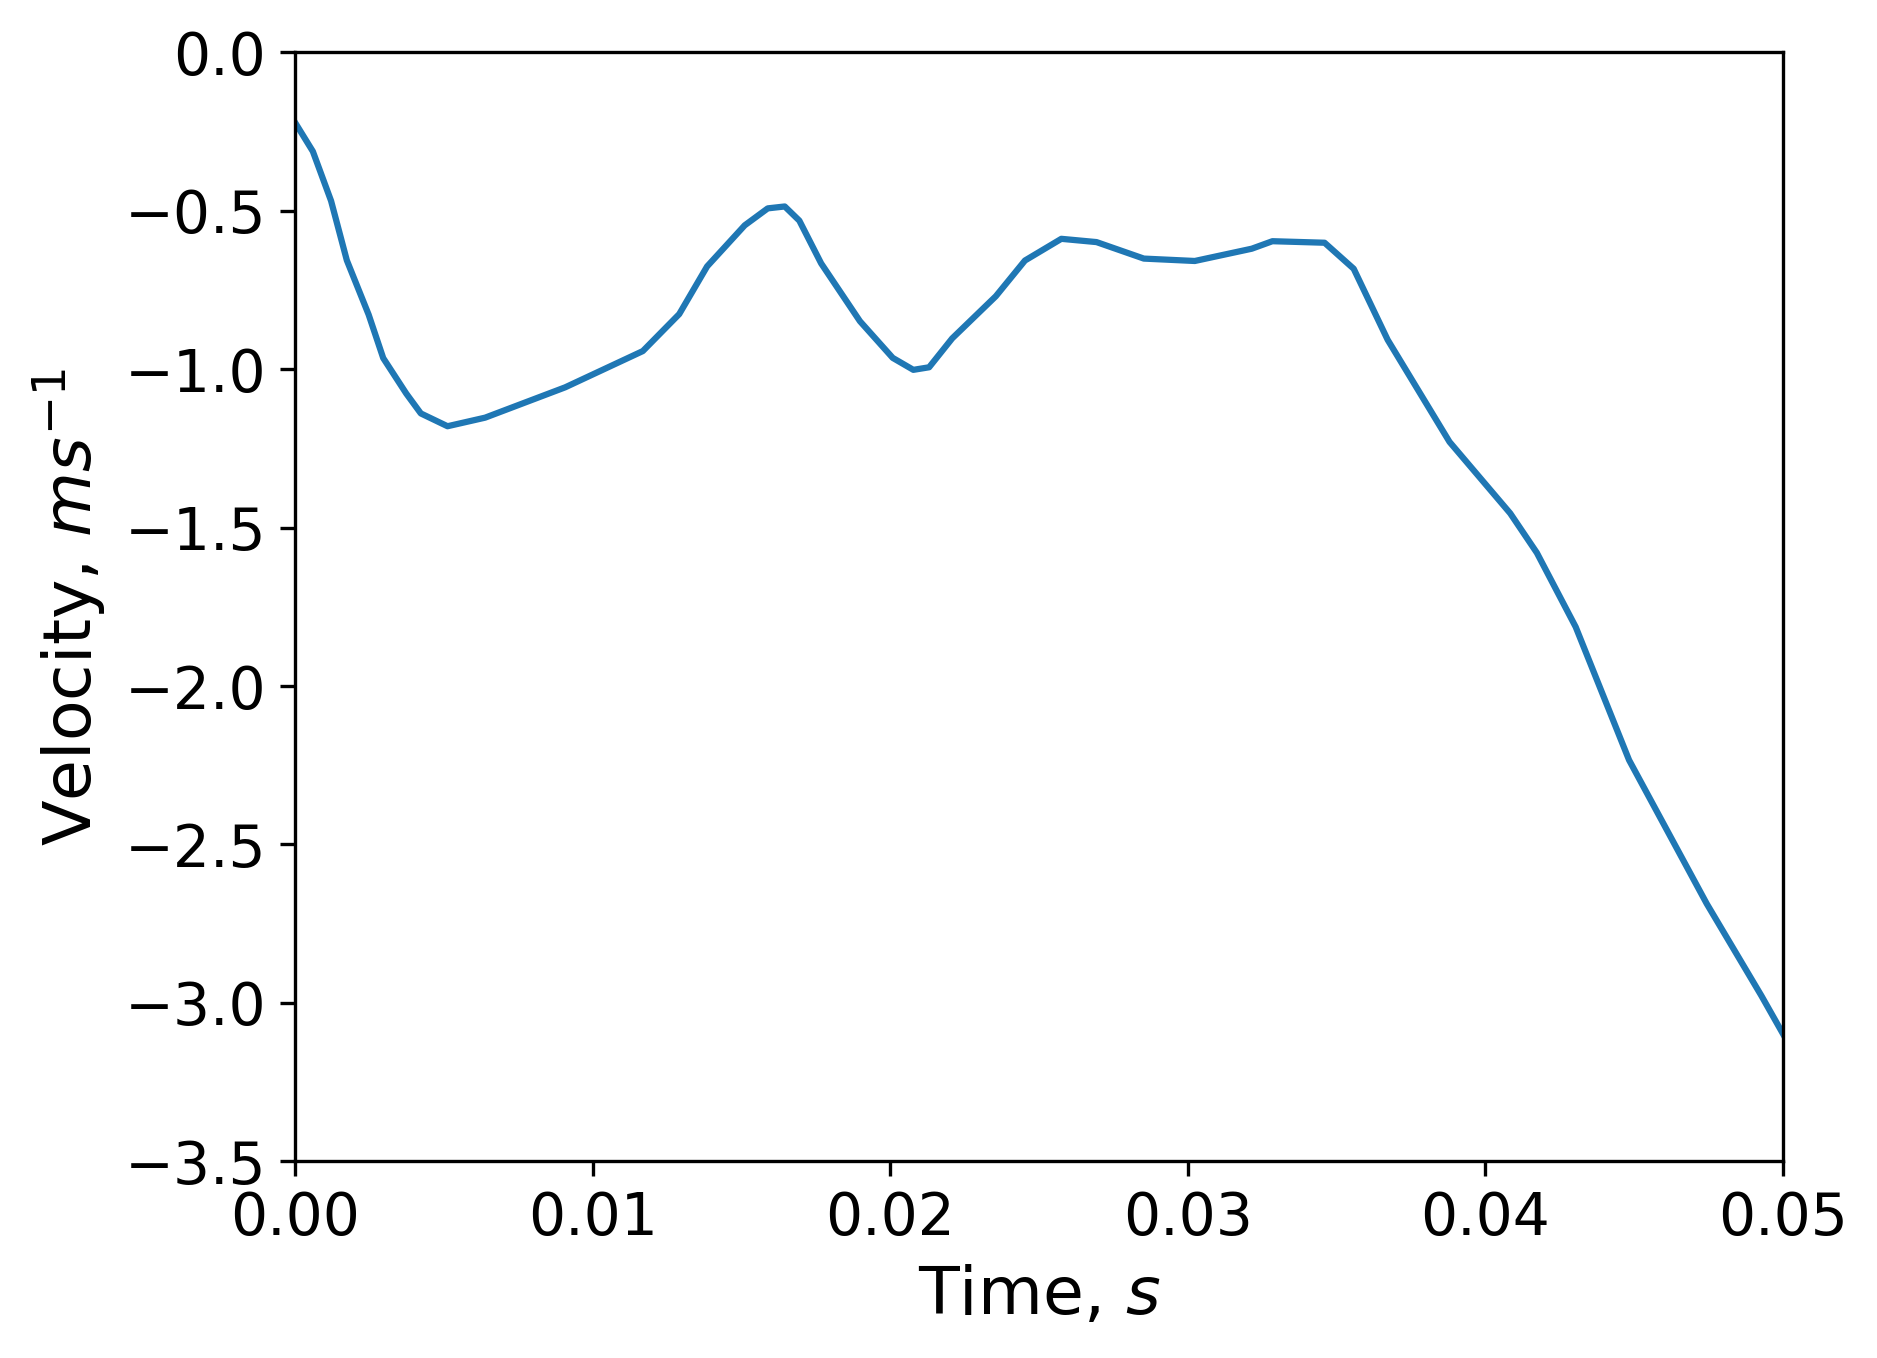

In [28]:
plt.figure()
#plt.plot(x, y, label='$x^2-3x$')
#plt.plot(eta, dydx1,label='Analytical')
plt.plot(x[0:148], final_result2)
#plt.plot(x[1:], y_vel, label='Smoothing')
plt.xlabel('Time, $s$',fontsize=16)
plt.ylabel('Velocity, $ms^{-1}$',fontsize=16)
plt.xlim([0, 0.05])
plt.ylim([-3.5, 0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(block=False)

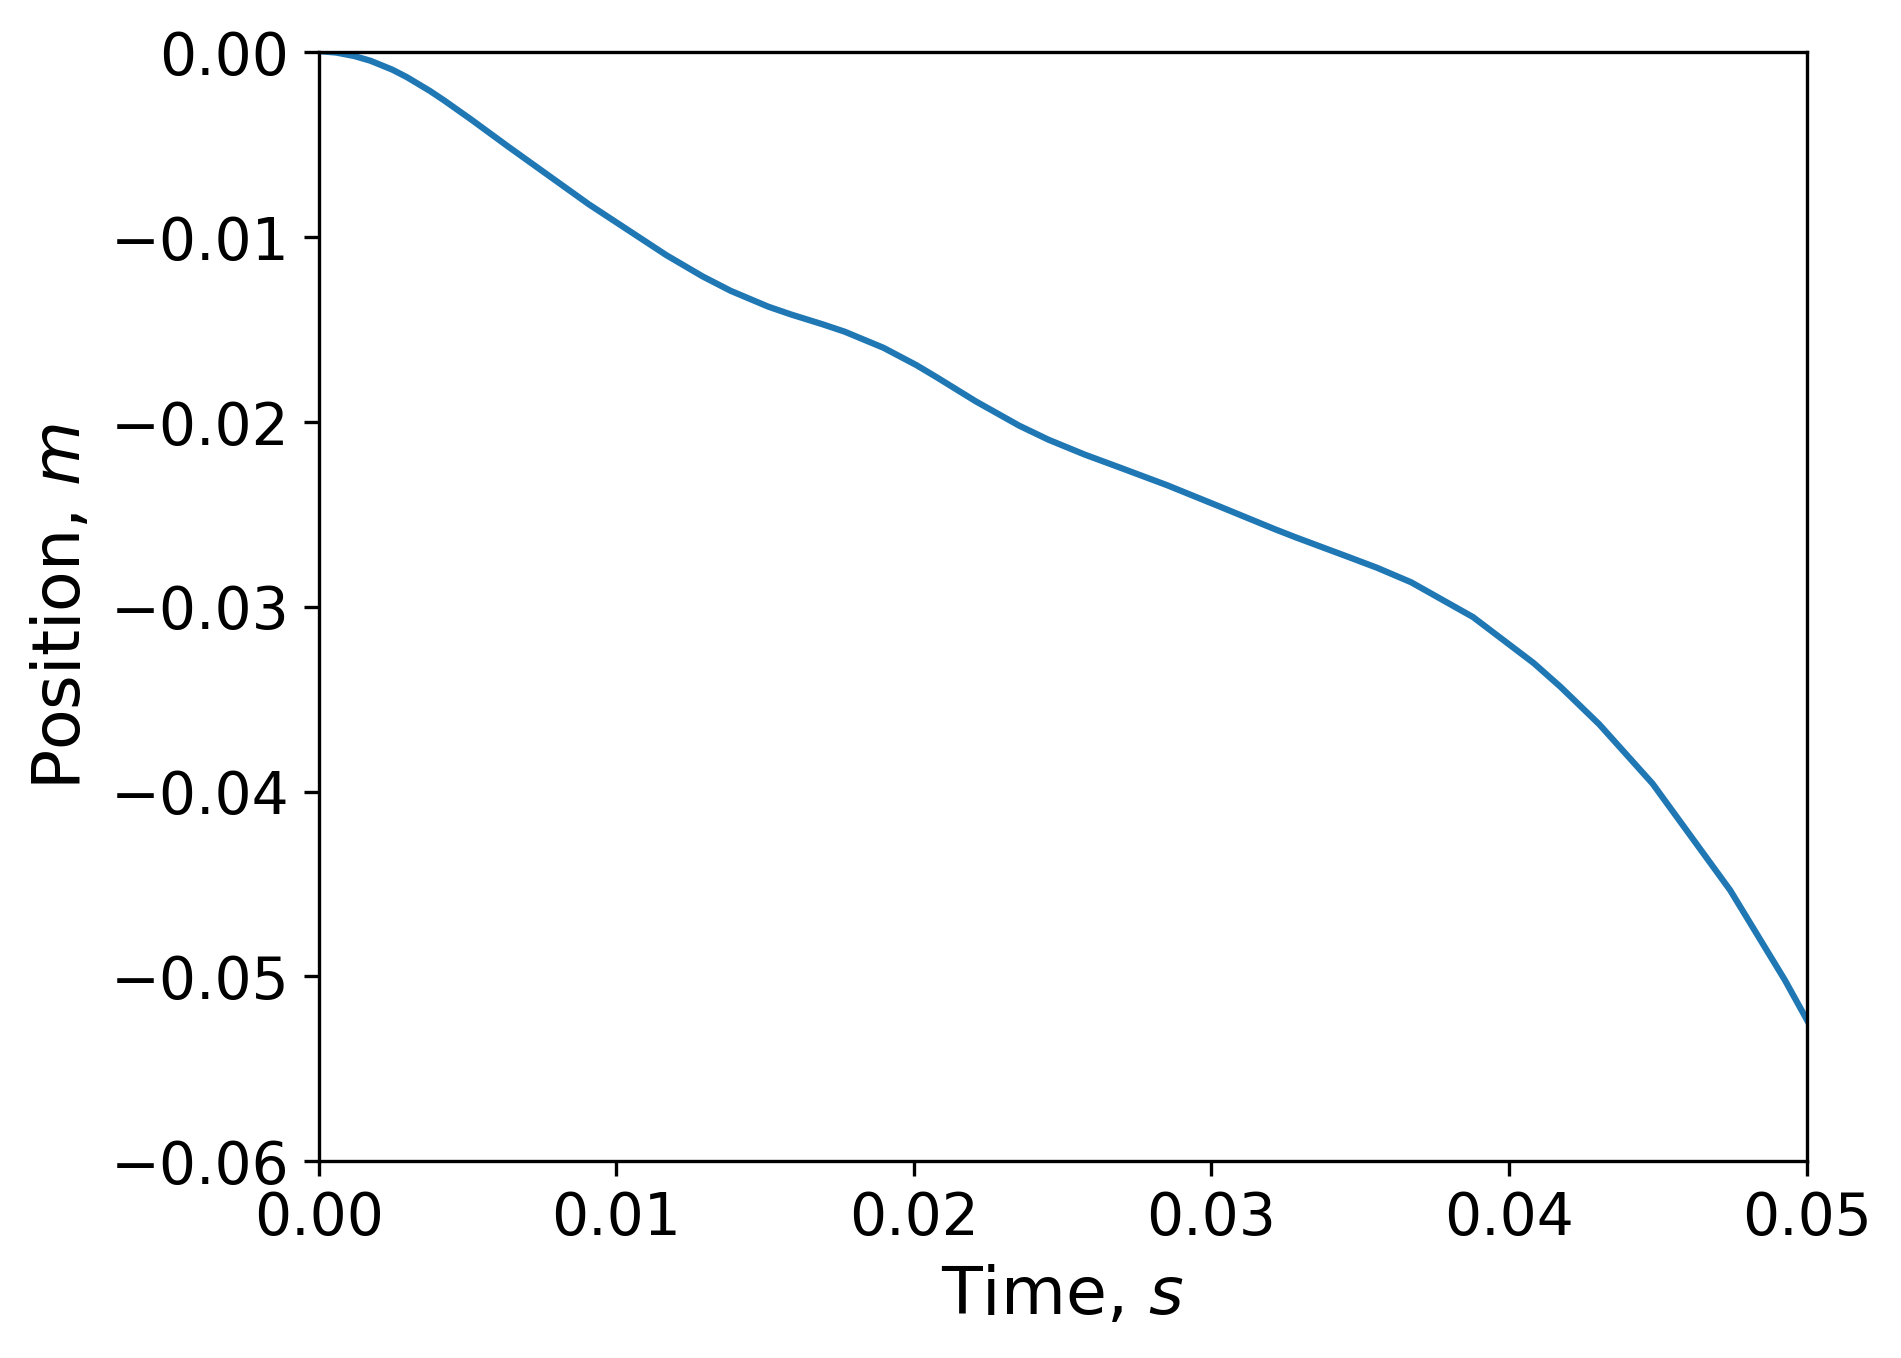

In [29]:
plt.figure()
#plt.plot(x, y, label='$x^2-3x$')
#plt.plot(eta, dydx1,label='Analytical')
plt.plot(x, u)
#plt.plot(x[1:], y_vel, label='Smoothing')
plt.xlabel('Time, $s$',fontsize=16)
plt.ylabel('Position, $m$',fontsize=16)
plt.xlim([0, 0.05])
plt.ylim([-0.06, 0])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show(block=False)

In [30]:
#acceleration computation
vel = np.column_stack((y_vel[1:], y_vel[:-1]))
tensor_vel_mod = torch.from_numpy(vel)

In [31]:
test_data_1 = np.ones(ite-1)
test_data_2 = np.ones(ite-1)
for i in range(ite-1):           
    outputs_test1 = model(tensor_vel_mod[i][:].float())
    outputs_test1.detach().numpy()
    outputs_test2 = model(tensor_x_mod[i][:].float())
    outputs_test2.detach().numpy()
    test_data_1[i] = test_data_1[i]*outputs_test1
    test_data_2[i] = test_data_2[i]*outputs_test2

In [32]:
Factor3 = np.reciprocal(test_data_2)
DLDC_accel = np.multiply(test_data_1,Factor3)

In [33]:
disp_file2 = r"C:\Users\icme2\Downloads\acceleration.csv"
df_disp2 = pd.read_csv(disp_file2)

In [34]:
Time = df_disp2['Time'].to_numpy()
Acceleration = df_disp2['Acceleration'].to_numpy()

In [35]:
Compare = np.gradient(y_vel,x[1:])

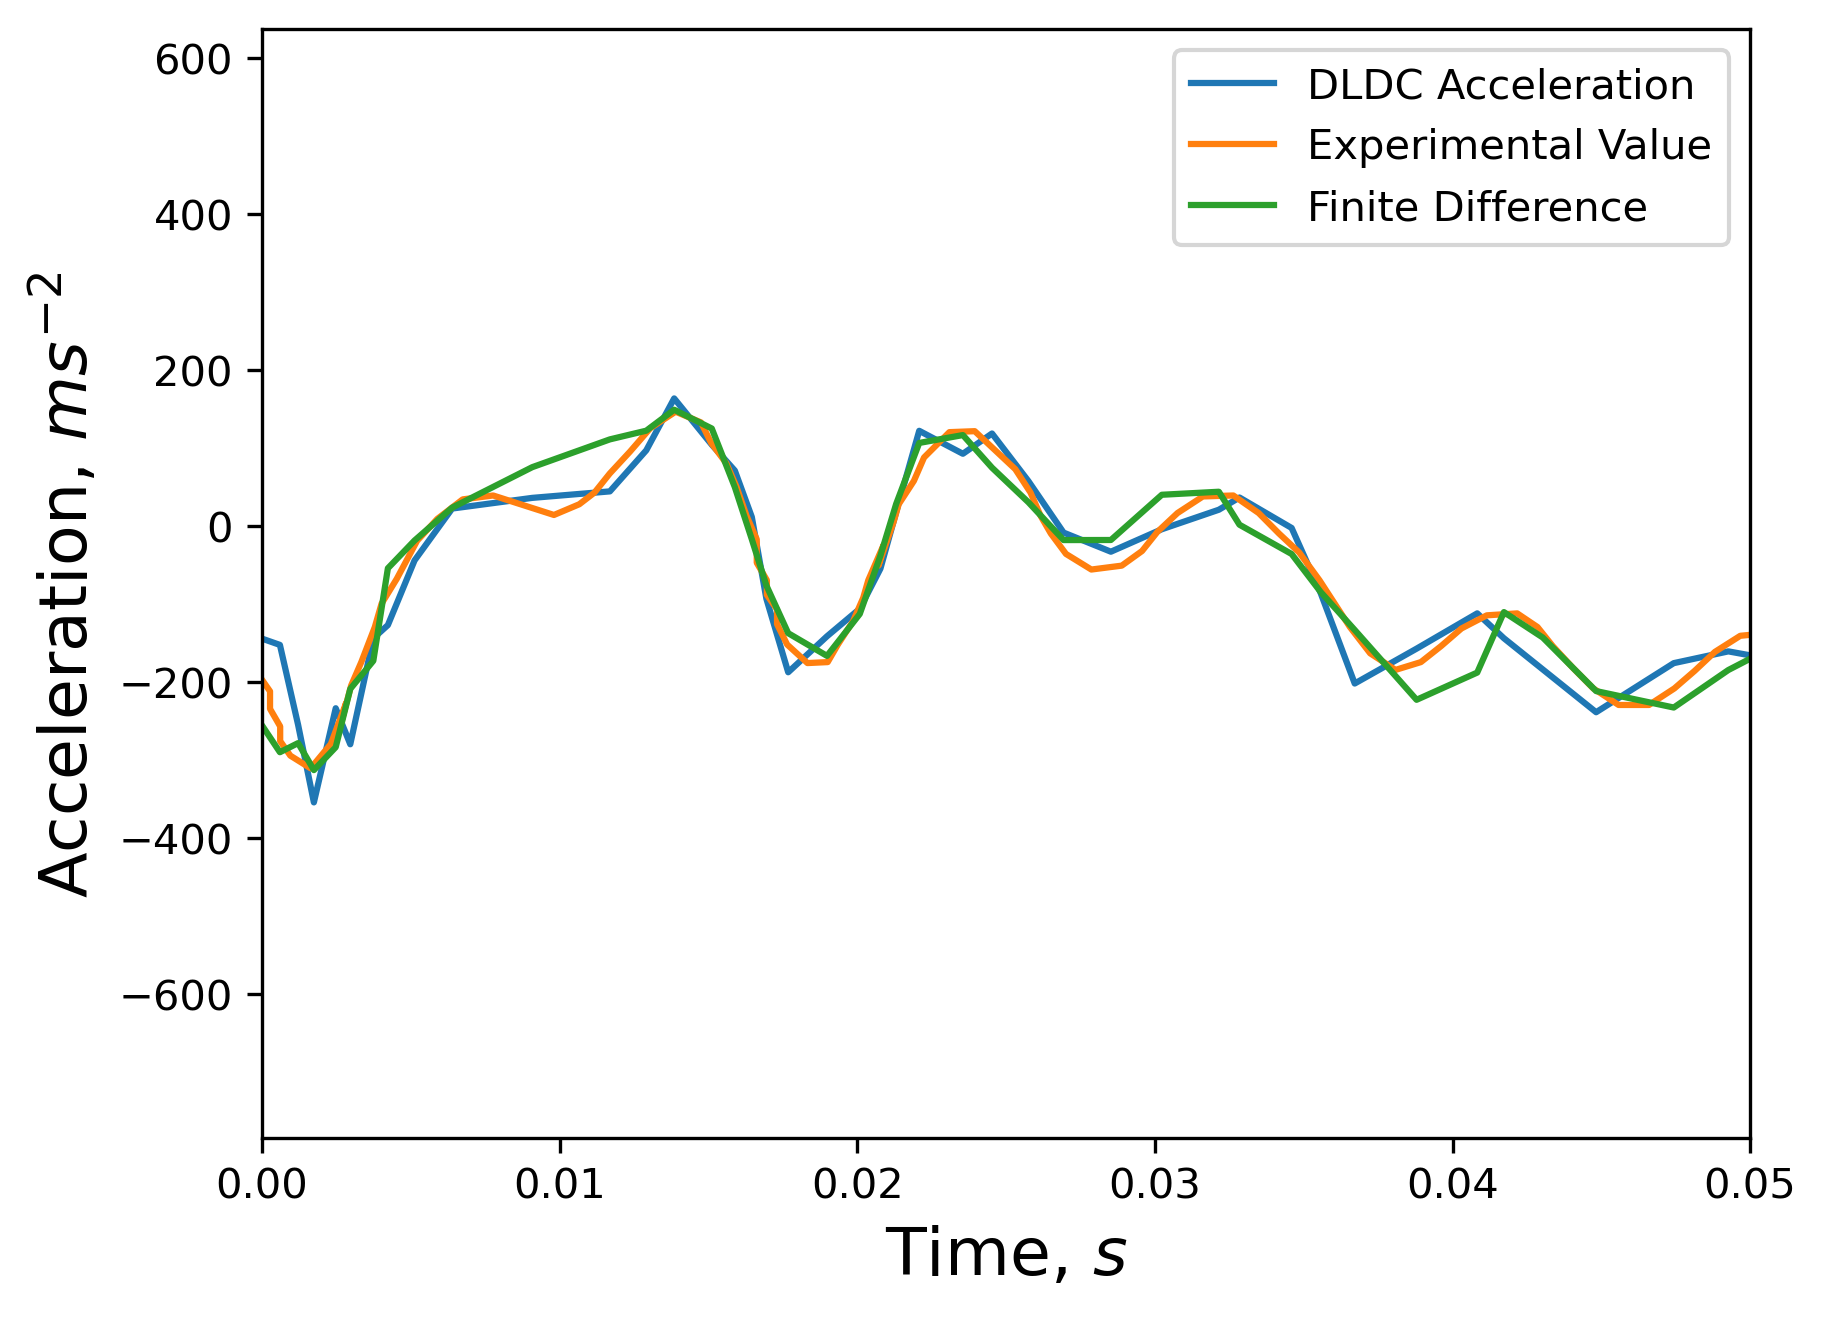

In [36]:
plt.plot(x[1:148], DLDC_accel, label='DLDC Acceleration')
plt.plot(Time, Acceleration, label='Experimental Value')
plt.plot(x[0:148], Compare, label='Finite Difference')
plt.xlim([0, 0.05])
plt.xlabel('Time, $s$',fontsize=16)
plt.ylabel('Acceleration, $ms^{-2}$',fontsize=16)
plt.legend()

In [37]:
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

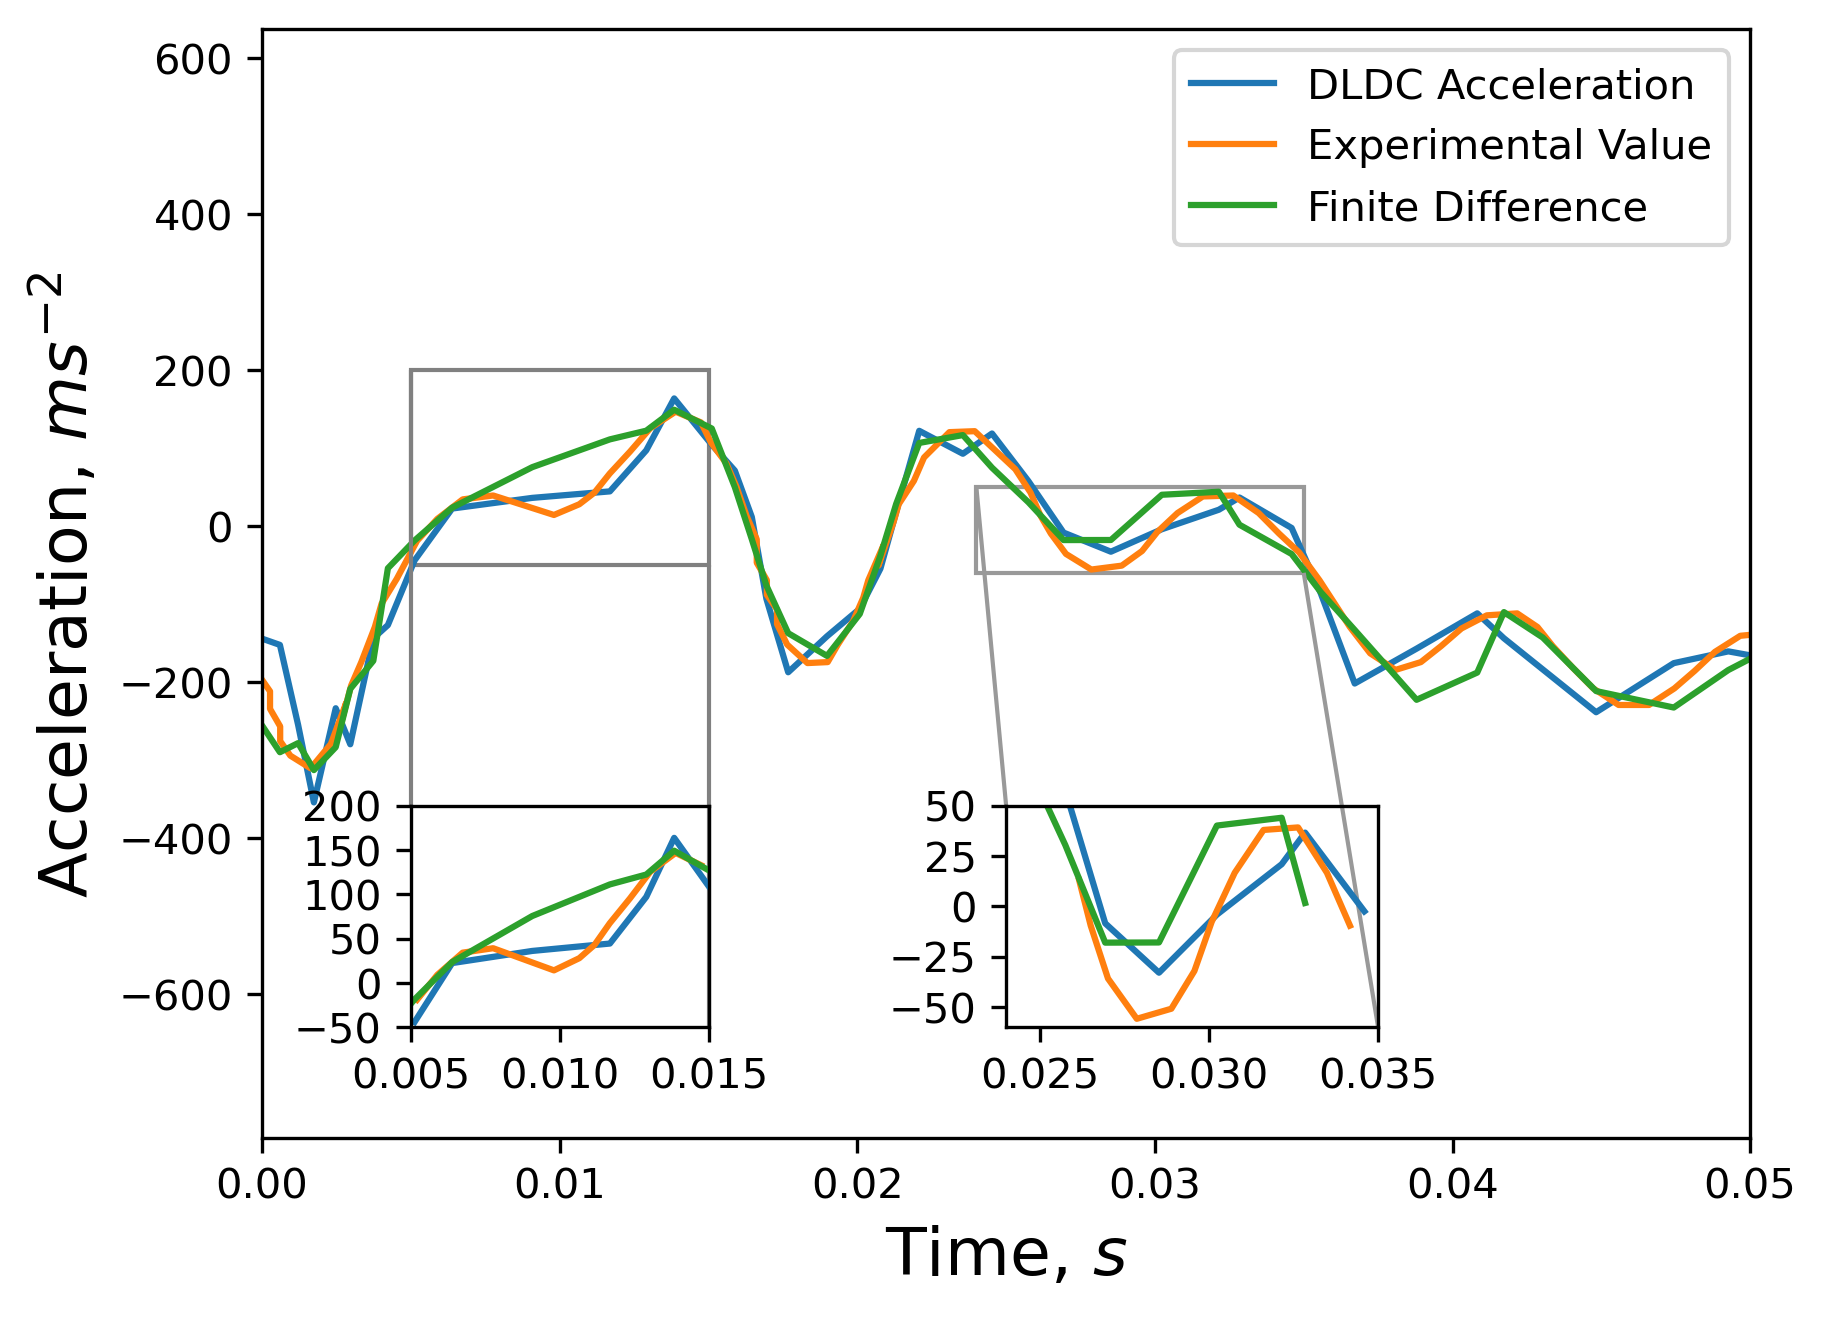

In [38]:
fig, ax1 = plt.subplots()
# The data.
ax1.plot(x[1:148], DLDC_accel, label='DLDC Acceleration')
# The Einstein fit.
ax1.plot(Time, Acceleration, label='Experimental Value')
ax1.plot(x[0:148], Compare, label='Finite Difference')
ax1.set_xlim([0, 0.05])
ax1.set_xlabel('Time, $s$',fontsize=16)
ax1.set_ylabel('Acceleration, $ms^{-2}$',fontsize=16)
ax1.legend(loc=0)

ax2 = plt.axes([0.005,44,0.015,200])
ip = InsetPosition(ax1, [0.1,0.1,0.2,0.2])
ax2.set_axes_locator(ip)
mark_inset(ax1, ax2, loc1=2, loc2=4, fc="none", ec='0.5')

# The data: only display for low temperature in the inset figure.
ax2.plot(x[15:23], DLDC_accel[14:22], label='Experiment')
ax2.plot(Time[26:39], Acceleration[26:39], label='Experiment')
ax2.plot(x[14:22], Compare[14:22], label='Experiment')

# Some ad hoc tweaks.
ax2.set_ylim(-44,200)
ax2.set_xlim(0.005,0.015)
ax2.set_yticks([-50, 0, 50, 100, 150, 200])

##################################################### ax3 #####################
ax3 = plt.axes([0.025,44,0.035,200])
ip1 = InsetPosition(ax1, [0.5,0.1,0.25,0.2])
ax3.set_axes_locator(ip1)
mark_inset(ax1, ax3, loc1=2, loc2=4, fc="none", ec='0.6')

# The data: only display for low temperature in the inset figure.
ax3.plot(x[33:40], DLDC_accel[32:39], label='Experiment')
ax3.plot(Time[67:79], Acceleration[67:79], label='Experiment')
ax3.plot(x[32:39], Compare[32:39], label='Experiment')

# Some ad hoc tweaks.
ax3.set_ylim(-60,50)
ax3.set_xlim(0.024,0.035)
ax3.set_yticks([-50, -25, 0, 25, 50])


plt.show()

In [39]:
np.where(Time == 3.55304100e-02)

(array([80], dtype=int64),)

In [40]:
Time

array([-5.86620000e-03, -4.84406100e-03, -3.82192300e-03, -2.79978400e-03,
       -1.94800200e-03, -1.43693300e-03, -9.25864000e-04, -7.55507000e-04,
       -4.14794000e-04, -7.40816000e-05, -7.40816000e-05,  2.66631000e-04,
        2.66631000e-04,  6.07344000e-04,  6.07344000e-04,  9.48057000e-04,
        1.62948300e-03,  2.31090800e-03,  2.82197800e-03,  2.65162100e-03,
        2.99233400e-03,  3.33304700e-03,  3.78733100e-03,  4.01447200e-03,
        4.52554200e-03,  4.86625500e-03,  5.20696700e-03,  5.88839300e-03,
        6.74017500e-03,  7.76231400e-03,  8.78445200e-03,  9.80659100e-03,
        1.06583730e-02,  1.11694420e-02,  1.16805110e-02,  1.23619370e-02,
        1.30433630e-02,  1.38951450e-02,  1.47469270e-02,  1.50876400e-02,
        1.55987090e-02,  1.59394220e-02,  1.62801350e-02,  1.66208480e-02,
        1.66208480e-02,  1.69615600e-02,  1.69615600e-02,  1.73022730e-02,
        1.73022730e-02,  1.76429860e-02,  1.83244120e-02,  1.90058370e-02,
        1.93465500e-02,  

In [41]:
DLDC_accel[14]

-44.07586276298932

In [42]:
x[40]

0.0355726

In [43]:
np.where(Time == 5.20696700e-03)

(array([26], dtype=int64),)

In [44]:
Time

array([-5.86620000e-03, -4.84406100e-03, -3.82192300e-03, -2.79978400e-03,
       -1.94800200e-03, -1.43693300e-03, -9.25864000e-04, -7.55507000e-04,
       -4.14794000e-04, -7.40816000e-05, -7.40816000e-05,  2.66631000e-04,
        2.66631000e-04,  6.07344000e-04,  6.07344000e-04,  9.48057000e-04,
        1.62948300e-03,  2.31090800e-03,  2.82197800e-03,  2.65162100e-03,
        2.99233400e-03,  3.33304700e-03,  3.78733100e-03,  4.01447200e-03,
        4.52554200e-03,  4.86625500e-03,  5.20696700e-03,  5.88839300e-03,
        6.74017500e-03,  7.76231400e-03,  8.78445200e-03,  9.80659100e-03,
        1.06583730e-02,  1.11694420e-02,  1.16805110e-02,  1.23619370e-02,
        1.30433630e-02,  1.38951450e-02,  1.47469270e-02,  1.50876400e-02,
        1.55987090e-02,  1.59394220e-02,  1.62801350e-02,  1.66208480e-02,
        1.66208480e-02,  1.69615600e-02,  1.69615600e-02,  1.73022730e-02,
        1.73022730e-02,  1.76429860e-02,  1.83244120e-02,  1.90058370e-02,
        1.93465500e-02,  

In [45]:
np.where(Time == 1.50876400e-02)

(array([39], dtype=int64),)

Text(0, 0.5, 'Acceleration, $ms^{-2}$')

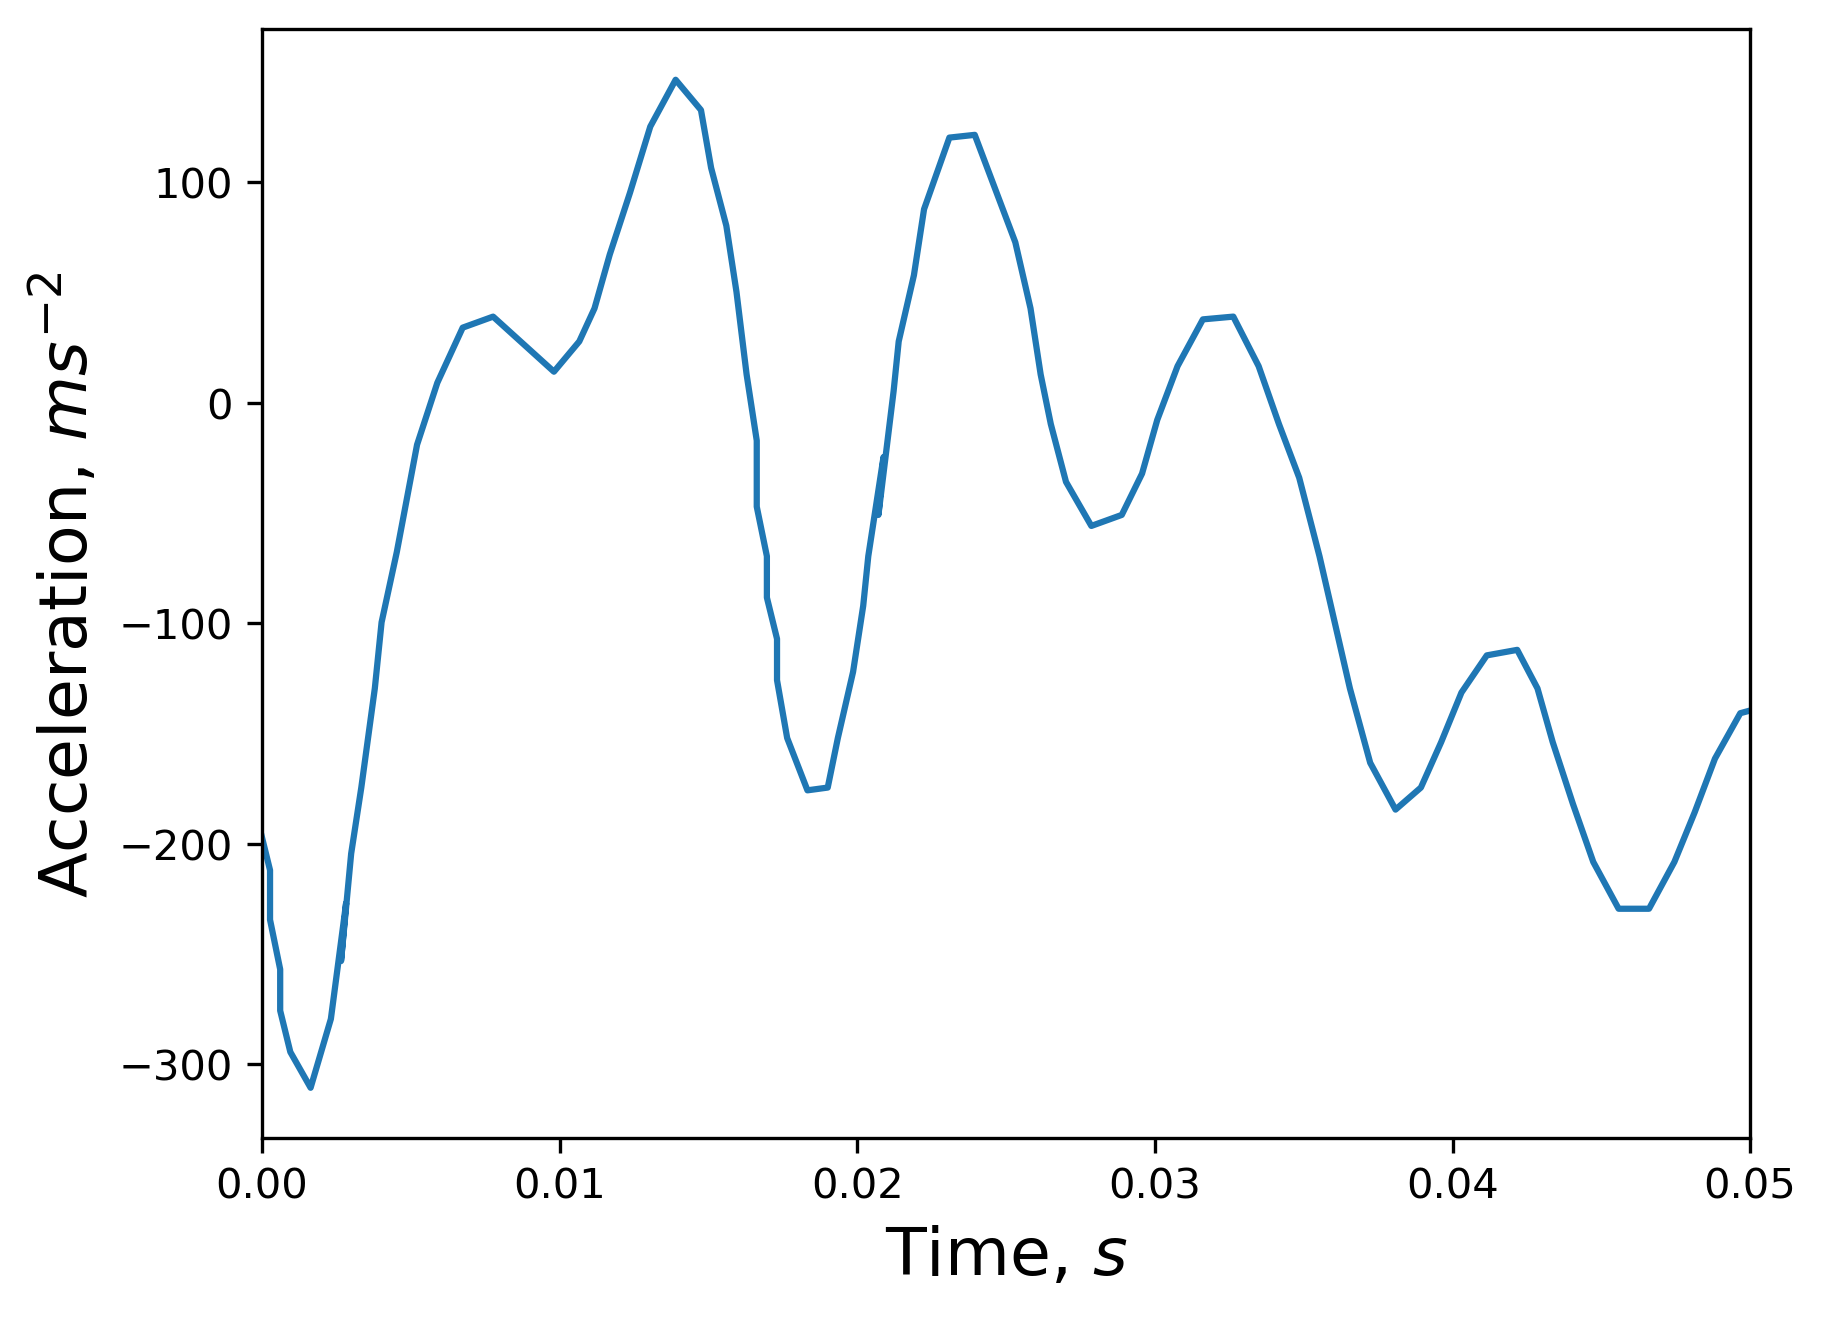

In [58]:
#plt.plot(x[1:148], DLDC_accel, label='DLDC Acceleration')
plt.plot(Time, Acceleration, label='Experimental Value')
#plt.plot(x[0:148], Compare, label='Finite Difference')
plt.xlim([0, 0.05])
plt.xlabel('Time, $s$',fontsize=16)
plt.ylabel('Acceleration, $ms^{-2}$',fontsize=16)
#plt.legend()